In [1]:
#classification and loan prediction model based on logistic regression

In [24]:
import pandas as pd
import numpy as np

In [25]:
cr = pd.read_csv(r"C:\Users\Siddharth Tripathi\Documents\CreditRisk.csv")

In [26]:
cr.shape

(981, 13)

In [27]:
cr.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,956.000000,981.000000,981.000000,954.000000,961.000000,902.000000
mean,0.881799,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,1.255623,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,0.000000,9.000000,6.000000,0.000000
25%,0.000000,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,2.000000,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,4.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [28]:
cr.head(35)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,4.0,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2.0,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1.0,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [29]:
cr.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [30]:
cr.Dependents = cr.Dependents.fillna(0.0)

In [31]:
cr.Credit_History = cr.Credit_History.fillna(0) #assuming that null values are 0

In [32]:
cr.Gender = cr.Gender.fillna('Male')
cr.Self_Employed = cr.Self_Employed.fillna('Yes')
cr.LoanAmount = cr.LoanAmount.fillna(cr.LoanAmount.mean()) #for data which is continuous, filling it with mean of all data of that column
cr.Loan_Amount_Term = cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.mean())

In [33]:
cr.isnull().sum()

Loan_ID              0
Gender               0
Married              3
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [34]:
#for the married column u can see their are just 3 null records, so we can drop them instead of replacing null values

cr = cr.dropna()

In [35]:
cr.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [36]:
#converting non numberic data into numeric and categorical data.

cr.Gender = cr.Gender.replace({'Male':1,'Female':0})


In [37]:
cr.Married = cr.Married.replace({'No':0,'Yes':1})


In [38]:
cr.Education = cr.Education.replace({"Graduate":1,"Not Graduate":0})


In [39]:
cr.Self_Employed = cr.Self_Employed.replace({"No":0,"Yes":1})


In [40]:
cr.Property_Area = cr.Property_Area.replace({"Semiurban":1,"Urban":2,"Rural":3})


In [41]:
cr.Loan_Status = cr.Loan_Status.replace({"Y":1,"N":0})

In [42]:
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,1,0,5849,0.0,142.51153,360.0,1.0,2,1
1,LP001003,1,1,1.0,1,0,4583,1508.0,128.00000,360.0,1.0,3,0
2,LP001005,1,1,0.0,1,1,3000,0.0,66.00000,360.0,1.0,2,1
3,LP001006,1,1,0.0,0,0,2583,2358.0,120.00000,360.0,1.0,2,1
4,LP001008,1,0,0.0,1,0,6000,0.0,141.00000,360.0,1.0,2,1


In [43]:
#Here our target variable or feature is loan status, whether the loan is approved or not. So lets set our target variable

cr_y= cr.iloc[:,-1]

In [44]:
cr_y

0      1
1      0
2      1
3      1
4      1
5      1
6      1
7      0
8      1
9      0
10     1
11     1
12     1
13     0
14     1
15     1
16     1
17     0
18     0
19     1
20     0
21     1
22     0
23     0
24     0
25     1
26     1
27     1
28     0
29     1
      ..
951    1
952    1
953    0
954    1
955    1
956    0
957    1
958    1
959    1
960    0
961    1
962    1
963    1
964    1
965    1
966    1
967    1
968    1
969    1
970    1
971    1
972    1
973    1
974    1
975    1
976    1
977    1
978    1
979    0
980    1
Name: Loan_Status, Length: 978, dtype: int64

In [45]:
#setting our independent feature or features which will help predict our target.

cr_x = cr.iloc[:,1:12]

In [46]:
cr_x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0.0,1,0,5849,0.0,142.51153,360.0,1.0,2
1,1,1,1.0,1,0,4583,1508.0,128.00000,360.0,1.0,3
2,1,1,0.0,1,1,3000,0.0,66.00000,360.0,1.0,2
3,1,1,0.0,0,0,2583,2358.0,120.00000,360.0,1.0,2
4,1,0,0.0,1,0,6000,0.0,141.00000,360.0,1.0,2


In [47]:
#Now lets make a model. Before this we were just cleaning and preparing data for our model. Now we will divide data into testig
#and training data. 

from sklearn.model_selection import train_test_split

In [48]:
#no as u can see --
# cr_x_train and cr_x_test contains data from cr_x and similarly for cr_y meaning for both target variable and independent feature
#data is divided.
#test_size =.2 means our testing data in both x and y will be 20% of total data. Meaning 80% data used as training
#random state is defined because if it is not give, re-iteration might cause some test data to go in train data because every
#time we run this model, data is splitted randomly. So random state is just to avoid it.

cr_x_train,cr_x_test,cr_y_train,cr_y_test =  train_test_split(cr_x,cr_y,test_size=0.2,random_state=101)

In [49]:
cr_x_train.shape

(782, 11)

In [50]:
cr_y_train.shape

(782,)

In [51]:
cr_x_test.shape

(196, 11)

In [52]:
#Now since our data is divided, lets train our logistic regression model on this data.

from sklearn.linear_model import LogisticRegression

In [53]:
model_logistic = LogisticRegression()

In [54]:
#building model or training model we use .fit(training features, training targets)
model_logistic.fit(cr_x_train,cr_y_train)

C:\Users\Siddharth Tripathi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [55]:
#Now we have trained our logistic regression model on training data, lets predict values for our test data

pred = model_logistic.predict(cr_x_test)
pred

#this matrix gives output in the form of 1,loan approved and 0 loan not approved. 

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1],
      dtype=int64)

In [56]:
#lets build confusion metrics

from sklearn.metrics import confusion_matrix

In [57]:
#creating confusion matrix for predicted values by our model and actual values.

tab_cr = confusion_matrix(pred, cr_y_test)

In [59]:
tab_cr

# 31 - true positive predicted positive and were true meaning loan granted predicted and actual value is also granted
# 35 - False negative predicted no granted but it was granted
# 10 - False positive predicted granted but was not grandted
# 120 - True Negative predicted not granted and actually not granted

array([[ 31,  10],
       [ 35, 120]], dtype=int64)

In [60]:
#If we calculate the probability of getting loan for each record. 

probabilistic_value = model_logistic.predict_proba(cr_x_test)

In [61]:
probabilistic_value

#1st column is probability of first record to have 0 or no loan, 0.9 proability of same in falling for 1 or loan granted

array([[0.09181662, 0.90818338],
       [0.26479233, 0.73520767],
       [0.54785866, 0.45214134],
       [0.14051596, 0.85948404],
       [0.08484933, 0.91515067],
       [0.21969842, 0.78030158],
       [0.19470644, 0.80529356],
       [0.23634513, 0.76365487],
       [0.13637989, 0.86362011],
       [0.16689559, 0.83310441],
       [0.77397641, 0.22602359],
       [0.23318436, 0.76681564],
       [0.07425244, 0.92574756],
       [0.54822327, 0.45177673],
       [0.48088895, 0.51911105],
       [0.75330366, 0.24669634],
       [0.35124727, 0.64875273],
       [0.76123945, 0.23876055],
       [0.64585165, 0.35414835],
       [0.06704012, 0.93295988],
       [0.17274182, 0.82725818],
       [0.11621471, 0.88378529],
       [0.55601191, 0.44398809],
       [0.05935157, 0.94064843],
       [0.65843871, 0.34156129],
       [0.09036295, 0.90963705],
       [0.18394882, 0.81605118],
       [0.59673619, 0.40326381],
       [0.46424223, 0.53575777],
       [0.18152433, 0.81847567],
       [0.

In [63]:
#Why calculating confusion matrix, to calculate precision of our model and to calculate TPR and FPRs for ROC curve
tab_cr.diagonal().sum()/tab_cr.sum()*100

#the precision comes out to be 77.04% which is good.

77.04081632653062

In [64]:
from sklearn.metrics import classification_report
print(classification_report(pred, cr_y_test))

#google for recall, f1-scores and precision

              precision    recall  f1-score   support

           0       0.47      0.76      0.58        41
           1       0.92      0.77      0.84       155

   micro avg       0.77      0.77      0.77       196
   macro avg       0.70      0.77      0.71       196
weighted avg       0.83      0.77      0.79       196



In [65]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [66]:
log_roc_auc = roc_auc_score(cr_y_test,pred)
log_roc_auc

0.6963869463869464

In [67]:
#convert pred_prob into data frame as we need the second column for ROC curve. Knowing the value of second column, the 
#probability for not falling in category 1 can be calculated automatically.

probabilistic_value_data_frame = pd.DataFrame(probabilistic_value)

In [69]:
probabilistic_value_data_frame.head()

,0,1
0,0.091817,0.908183
1,0.264792,0.735208
2,0.547859,0.452141
3,0.140516,0.859484
4,0.084849,0.915151


In [70]:
#Calculating FPR - false positive rate, True positive rate and threshold

fpr, tpr, threshold = roc_curve(cr_y_test,probabilistic_value_data_frame.iloc[:,1])

In [71]:
fpr

array([0.        , 0.        , 0.        , 0.01515152, 0.01515152,
       0.03030303, 0.03030303, 0.04545455, 0.04545455, 0.06060606,
       0.06060606, 0.07575758, 0.07575758, 0.09090909, 0.09090909,
       0.10606061, 0.10606061, 0.12121212, 0.12121212, 0.13636364,
       0.13636364, 0.16666667, 0.16666667, 0.21212121, 0.21212121,
       0.24242424, 0.24242424, 0.25757576, 0.25757576, 0.27272727,
       0.27272727, 0.28787879, 0.28787879, 0.31818182, 0.31818182,
       0.33333333, 0.33333333, 0.34848485, 0.34848485, 0.36363636,
       0.36363636, 0.37878788, 0.37878788, 0.39393939, 0.39393939,
       0.40909091, 0.40909091, 0.46969697, 0.46969697, 0.53030303,
       0.53030303, 0.56060606, 0.56060606, 0.59090909, 0.59090909,
       0.62121212, 0.62121212, 0.66666667, 0.66666667, 0.6969697 ,
       0.6969697 , 0.83333333, 0.83333333, 0.96969697, 0.96969697,
       1.        ])

In [72]:
tpr

array([0.        , 0.00769231, 0.01538462, 0.01538462, 0.02307692,
       0.02307692, 0.2       , 0.2       , 0.22307692, 0.22307692,
       0.24615385, 0.24615385, 0.3       , 0.3       , 0.33076923,
       0.33076923, 0.40769231, 0.40769231, 0.41538462, 0.41538462,
       0.44615385, 0.44615385, 0.49230769, 0.49230769, 0.53076923,
       0.53076923, 0.54615385, 0.54615385, 0.60769231, 0.60769231,
       0.69230769, 0.69230769, 0.71538462, 0.71538462, 0.74615385,
       0.74615385, 0.78461538, 0.78461538, 0.84615385, 0.84615385,
       0.86923077, 0.86923077, 0.88461538, 0.88461538, 0.9       ,
       0.9       , 0.90769231, 0.90769231, 0.92307692, 0.92307692,
       0.93076923, 0.93076923, 0.93846154, 0.93846154, 0.95384615,
       0.95384615, 0.96153846, 0.96153846, 0.96923077, 0.96923077,
       0.97692308, 0.97692308, 0.99230769, 0.99230769, 1.        ,
       1.        ])

In [73]:
threshold

array([1.95575228, 0.95575228, 0.94542506, 0.943926  , 0.94064843,
       0.93835561, 0.90928507, 0.90919644, 0.90202979, 0.90142212,
       0.89977802, 0.89885877, 0.88815735, 0.88815663, 0.88649808,
       0.88637041, 0.87618975, 0.87537692, 0.8734348 , 0.87214695,
       0.85961092, 0.85948404, 0.83914348, 0.83851669, 0.83310441,
       0.83138053, 0.83006906, 0.82859753, 0.81605118, 0.81372435,
       0.79763713, 0.7945619 , 0.7935362 , 0.78802653, 0.78027134,
       0.77955348, 0.76462582, 0.76365487, 0.73520767, 0.72109988,
       0.70059403, 0.68877062, 0.66585085, 0.64875273, 0.63611438,
       0.61626866, 0.56818332, 0.54638368, 0.53575777, 0.51457308,
       0.45930783, 0.45214134, 0.45177673, 0.44033648, 0.42819667,
       0.40504305, 0.40326381, 0.38529152, 0.38516558, 0.36984344,
       0.36451746, 0.30178311, 0.29081491, 0.20680899, 0.18389876,
       0.11925771])

In [74]:
import matplotlib.pyplot as pt

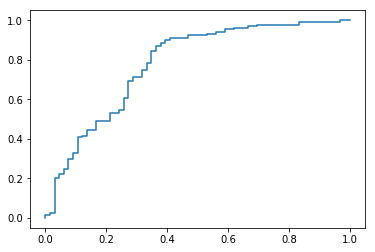

In [75]:
pt.plot(fpr,tpr)

Text(0.5, 1.0, 'AUROC curve')

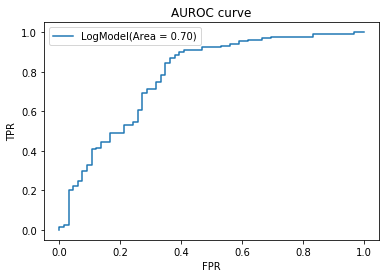

In [76]:
pt.plot(fpr,tpr,label="LogModel(Area = %.2f)" %log_roc_auc)
pt.xlabel("FPR")
pt.ylabel("TPR")
pt.legend(loc="upper left")
pt.title("AUROC curve")

In [77]:
#Now to implement this data in industry use for example in bank website etc, we can do following steps. 
#first - make predictions of whole data (exclude target variable) instead of training or testing. 

model_logistic.predict(cr_x)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,

In [78]:
#probabilistic prediction will give probability of loan status for each applicant. 
prob_each_applicant=model_logistic.predict_proba(cr_x)
prob_each_applicant


array([[0.1819333 , 0.8180667 ],
       [0.15733464, 0.84266536],
       [0.10451705, 0.89548295],
       ...,
       [0.61646816, 0.38353184],
       [0.17093366, 0.82906634],
       [0.16897046, 0.83102954]])

In [79]:
prob_each_applicant =  pd.DataFrame(prob_each_applicant)

In [80]:
prob_each_applicant.head()

,0,1
0,0.181933,0.818067
1,0.157335,0.842665
2,0.104517,0.895483
3,0.165778,0.834222
4,0.180957,0.819043


In [81]:
type(prob_each_applicant)

pandas.core.frame.DataFrame

In [82]:
#need to convert it into pandas dataframe because we need to concat our unique
#identity column in it.Lets also rename our dataframe columns for better view here loan ID
prob_each_applicant = prob_each_applicant.rename(columns={prob_each_applicant.columns[0]:"Loan_Not_Approved",prob_each_applicant.columns[1]:"Loan_Approved"})
prob_each_applicant.head()

,Loan_Not_Approved,Loan_Approved
0,0.181933,0.818067
1,0.157335,0.842665
2,0.104517,0.895483
3,0.165778,0.834222
4,0.180957,0.819043


In [86]:
prob_each_applicant =  pd.concat([prob_each_applicant,pd.Series(cr.Loan_ID)],axis=1)

In [87]:
prob_each_applicant.head()

,Loan_Not_Approved,Loan_Approved,Loan_ID
0,0.181933,0.818067,LP001002
1,0.157335,0.842665,LP001003
2,0.104517,0.895483,LP001005
3,0.165778,0.834222,LP001006
4,0.180957,0.819043,LP001008


In [88]:
#Now as we sort the probabilities according to the unique identity number, we can tell by seeing that LoanID 412 has highest
#probability of falling into Laon Approved condition. We can pull out all customers above 0.8 probability as high potential customers.
#lets see it in future rows. 

prob_each_applicant = prob_each_applicant.sort_values(["Loan_Approved"], ascending=False)


In [92]:
prob_each_applicant.count()

Loan_Not_Approved    978
Loan_Approved        978
Loan_ID              978
dtype: int64

In [94]:
customers_high_potential = (prob_each_applicant.Loan_Approved>0.9)
customers_high_potential_df = prob_each_applicant[customers_high_potential]
customers_high_potential_df

,Loan_Not_Approved,Loan_Approved,Loan_ID
692,0.042003,0.957997,LP001415
184,0.043167,0.956833,LP001639
132,0.044248,0.955752,LP001478
670,0.048848,0.951152,LP001317
181,0.051834,0.948166,LP001634
331,0.054575,0.945425,LP002098
587,0.055254,0.944746,LP002917
182,0.056074,0.943926,LP001636
492,0.056498,0.943502,LP002571
475,0.059352,0.940648,LP002527


In [95]:
#164 customers have Loan_approved probability above 0.9 or 90% out of all the records of our dataset.
customers_high_potential_df.count()

Loan_Not_Approved    164
Loan_Approved        164
Loan_ID              163
dtype: int64

In [100]:
#Now lets create a simple python program on console to implement our model for loan prediction

def enter_data():
    global data_frame_loan
    ApplicantIncome = eval(input("Enter Applicant's Income ::"))
    CoapplicantIncome = eval(input("Enter Co-Applicant's Income ::"))
    Credit_History =  eval(input("Enter Credit History - 1 if good 0 if bad"))
    Dependents = eval(input("Enter dependents on Applicant - Value b/w 0 and 4"))
    Education = eval(input("Enter Education, between 1-3"))
    Gender = eval(input("Enter your Gender -- 1 for Male and 0 for Female"))
    LoanAmount =  eval(input("Enter Loan Amount you want"))
    Loan_Amount_Term = eval(input("value of Loan Amount ::"))
    Married = eval(input("Enter 1 if Married and 0 if Not Married"))
    Property_Area = eval(input("Enter 1: Urban, 2: Rural, 3: Semi-Urban Property"))
    Self_Employed = eval(input("Enter 1 if Self-Employed else 0"))
    data_frame_loan = pd.DataFrame({"Gender":[Gender],"Married":[Married],"Dependents":[Dependents],
                                   "Education":[Education],"Self_Employed":[Self_Employed],"ApplicantIncome":[ApplicantIncome],
                                   "CoapplicantIncome":[CoapplicantIncome],"LoanAmount":[LoanAmount],"Loan_Amount_Term":[Loan_Amount_Term],
                                   "Credit_History":[Credit_History],"Property_Area":[Property_Area]})
    data_frame_loan.Gender = data_frame_loan.Gender.astype('category')
    data_frame_loan.Married = data_frame_loan.Married.astype('category')
    data_frame_loan.Education = data_frame_loan.Education.astype('category')
    data_frame_loan.Self_Employed = data_frame_loan.Self_Employed.astype('category')
    data_frame_loan.Property_Area = data_frame_loan.Property_Area.astype('category')
    global pred_values_applicant
    pred_values_applicant= model_logistic.predict(data_frame_loan)
    global probability_applicant
    probability_applicant = model_logistic.predict_proba(data_frame_loan)
    if pred_values_applicant == 0:
        print("--Chances of Getting Loan approved are low")
        print("--Probability of not getting Loan",probability_applicant[0][0])
    else:
        print("--Chances of Getting Loan Approved are High")
        print("--Probability of Getting Loan Approved is -",probability_applicant[0][1])

In [101]:
enter_data()

Enter Applicant's Income ::2000
Enter Co-Applicant's Income ::500
Enter Credit History - 1 if good 0 if bad1
Enter dependents on Applicant - Value b/w 0 and 43
Enter Education, between 1-32
Enter your Gender -- 1 for Male and 0 for Female1
Enter Loan Amount you want8000
value of Loan Amount ::255
Enter 1 if Married and 0 if Not Married1
Enter 1: Urban, 2: Rural, 3: Semi-Urban Property1
Enter 1 if Self-Employed else 01
--Chances of Getting Loan approved are low
--Probability of getting Loan 0.9999993404500893
